In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://data.cityofnewyork.us/api/views/9hxz-c2kj/rows.csv')
#picking data to review

In [3]:
df
#looking at data after report pull

,Record ID,SchoolName,Borough,Building,Street,Address Line 1,City,ZipCode,Last Inspection Date,Permittee,...,Violation Description,Critical Level,LATITUDE,LONGITUDE,COMMUNITYBOARD,COUNCILDISTRICT,CENSUSTRACT,BIN,BBL,NTA
0,347831,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,616,QUINCY ST,616 QUINCY ST,"BROOKLYN, NY 11221",11221.0,10/08/2019,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,...,"No facilities available to wash, rinse and san...",C,40.688688,-73.935499,303.0,36.0,29300.0,3044493.0,3016300001,BK35
1,130374,WILLIAM SPYROPOULOS SCHOOL,Queens,19610,NORTHERN BOULEVARD,19610 NORTHERN BOULEVARD,"FLUSHING, NY 11358",11358.0,01/18/2019,NICHOLAS GREEK ST.,...,Filth flies or food/refuse/sewage-associated (...,C,40.757903,-73.785196,411.0,19.0,145101.0,4124560.0,4055200001,QN48
2,54040,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,150,WEST 105 STREET,150 WEST 105 STREET,"NEW YORK, NY 10025",10025.0,11/25/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,...,Non-food contact surface improperly constructe...,G,40.799369,-73.965308,107.0,7.0,18900.0,1076625.0,1018590001,MN12
3,54627,P.S. 119 BROOKLYN,Brooklyn,3829,AVENUE K,3829 AVENUE K,"BROOKLYN, NY 11210",11210.0,07/24/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,...,Accurate thermometer not provided in refrigera...,G,40.625655,-73.938265,318.0,45.0,73400.0,3215816.0,3077860001,BK58
4,82920,MERKAZ HATORAH OF BELLE HARBOR,Queens,505,BEACH 129 STREET,505 BEACH 129 STREET,"BELLE HARBOR, NY 11694",11694.0,11/06/2019,HATORAH OF BELL MERCAZ,...,"Current valid permit, registration or other au...",AV,40.580035,-73.850350,414.0,32.0,93401.0,4304071.0,4161970041,QN10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24545,86812,ST. ELIZABETH SCHOOL,Manhattan,612,WEST 187 STREET,612 WEST 187 STREET,"NEW YORK, NY 10033",10033.0,08/05/2019,ARCHDIOCESE OF NEW YORK,...,Non-food contact surface improperly constructe...,G,40.853222,-73.931409,112.0,10.0,27100.0,1063977.0,1021660066,MN35
24546,82520,MAGEN DAVID YESHIVAH HIGH SCHOOL,Brooklyn,7801,BAY PARKWAY,7801 BAY PARKWAY,"Brooklyn, NY 11214",11214.0,11/25/2019,MAGEN DAVID YESHIVA,...,Plumbing not properly installed or maintained;...,G,40.606359,-73.989210,311.0,44.0,27000.0,3256802.0,3062650006,BK28
24547,334920,YESHIVA MEOR HATALMUD,Brooklyn,1368,39TH ST,1368 39TH ST,"BROOKLYN, NY 11218",11218.0,09/10/2019,CONGREGATION YMH,...,"Toxic chemical improperly labeled, stored or u...",C,40.639768,-73.984899,312.0,39.0,23000.0,3123311.0,3052980034,BK88
24548,106703,P.S. 254 QUEENS,Queens,84-40,101 STREET,84-40 101 STREET,"RICHMOND HILL, NY 11418",11418.0,08/07/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,...,Cold food item held above 41º F (smoked fish a...,C,40.697954,-73.847960,409.0,32.0,2400.0,4191296.0,4091770023,QN54


In [4]:
#looking at columns to begin the analysis
df.columns

Index(['Record ID', 'SchoolName', 'Borough', 'Building', 'Street',
       'Address Line 1', 'City', 'ZipCode', 'Last Inspection Date',
       'Permittee', 'Inspection Date', 'Code', 'Violation Description',
       'Critical Level', 'LATITUDE', 'LONGITUDE', 'COMMUNITYBOARD',
       'COUNCILDISTRICT', 'CENSUSTRACT', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [5]:
#prepare to delete columns not need for the analysis
drop_cols=['Record ID','LATITUDE','LONGITUDE','COMMUNITYBOARD','COUNCILDISTRICT','CENSUSTRACT','BIN',
          'BBL','NTA','Inspection Date','Last Inspection Date','Violation Description','Code']
df.drop(drop_cols, inplace= True, axis=1)

In [6]:
df
#looking at data after removing the columns need delete analysis

,SchoolName,Borough,Building,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,616,QUINCY ST,616 QUINCY ST,"BROOKLYN, NY 11221",11221.0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,C
1,WILLIAM SPYROPOULOS SCHOOL,Queens,19610,NORTHERN BOULEVARD,19610 NORTHERN BOULEVARD,"FLUSHING, NY 11358",11358.0,NICHOLAS GREEK ST.,C
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,150,WEST 105 STREET,150 WEST 105 STREET,"NEW YORK, NY 10025",10025.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
3,P.S. 119 BROOKLYN,Brooklyn,3829,AVENUE K,3829 AVENUE K,"BROOKLYN, NY 11210",11210.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,505,BEACH 129 STREET,505 BEACH 129 STREET,"BELLE HARBOR, NY 11694",11694.0,HATORAH OF BELL MERCAZ,AV
...,...,...,...,...,...,...,...,...,...
24545,ST. ELIZABETH SCHOOL,Manhattan,612,WEST 187 STREET,612 WEST 187 STREET,"NEW YORK, NY 10033",10033.0,ARCHDIOCESE OF NEW YORK,G
24546,MAGEN DAVID YESHIVAH HIGH SCHOOL,Brooklyn,7801,BAY PARKWAY,7801 BAY PARKWAY,"Brooklyn, NY 11214",11214.0,MAGEN DAVID YESHIVA,G
24547,YESHIVA MEOR HATALMUD,Brooklyn,1368,39TH ST,1368 39TH ST,"BROOKLYN, NY 11218",11218.0,CONGREGATION YMH,C
24548,P.S. 254 QUEENS,Queens,84-40,101 STREET,84-40 101 STREET,"RICHMOND HILL, NY 11418",11418.0,NEW YORK CITY DEPARTMENT OF EDUCATION,C


In [7]:
df1=df.rename(columns={'Building':'Building_number','Address line 1':'Address'})
#rename the columns

In [8]:
df1
#look at information after rename columns

,SchoolName,Borough,Building_number,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,616,QUINCY ST,616 QUINCY ST,"BROOKLYN, NY 11221",11221.0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,C
1,WILLIAM SPYROPOULOS SCHOOL,Queens,19610,NORTHERN BOULEVARD,19610 NORTHERN BOULEVARD,"FLUSHING, NY 11358",11358.0,NICHOLAS GREEK ST.,C
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,150,WEST 105 STREET,150 WEST 105 STREET,"NEW YORK, NY 10025",10025.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
3,P.S. 119 BROOKLYN,Brooklyn,3829,AVENUE K,3829 AVENUE K,"BROOKLYN, NY 11210",11210.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,505,BEACH 129 STREET,505 BEACH 129 STREET,"BELLE HARBOR, NY 11694",11694.0,HATORAH OF BELL MERCAZ,AV
...,...,...,...,...,...,...,...,...,...
24545,ST. ELIZABETH SCHOOL,Manhattan,612,WEST 187 STREET,612 WEST 187 STREET,"NEW YORK, NY 10033",10033.0,ARCHDIOCESE OF NEW YORK,G
24546,MAGEN DAVID YESHIVAH HIGH SCHOOL,Brooklyn,7801,BAY PARKWAY,7801 BAY PARKWAY,"Brooklyn, NY 11214",11214.0,MAGEN DAVID YESHIVA,G
24547,YESHIVA MEOR HATALMUD,Brooklyn,1368,39TH ST,1368 39TH ST,"BROOKLYN, NY 11218",11218.0,CONGREGATION YMH,C
24548,P.S. 254 QUEENS,Queens,84-40,101 STREET,84-40 101 STREET,"RICHMOND HILL, NY 11418",11418.0,NEW YORK CITY DEPARTMENT OF EDUCATION,C


In [9]:
df.head()
#looking after information after cleaning and remove data

,SchoolName,Borough,Building,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,616,QUINCY ST,616 QUINCY ST,"BROOKLYN, NY 11221",11221.0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,C
1,WILLIAM SPYROPOULOS SCHOOL,Queens,19610,NORTHERN BOULEVARD,19610 NORTHERN BOULEVARD,"FLUSHING, NY 11358",11358.0,NICHOLAS GREEK ST.,C
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,150,WEST 105 STREET,150 WEST 105 STREET,"NEW YORK, NY 10025",10025.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
3,P.S. 119 BROOKLYN,Brooklyn,3829,AVENUE K,3829 AVENUE K,"BROOKLYN, NY 11210",11210.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,505,BEACH 129 STREET,505 BEACH 129 STREET,"BELLE HARBOR, NY 11694",11694.0,HATORAH OF BELL MERCAZ,AV


In [10]:
#looking at data for critical level specifically
df1['Critical Level'].unique()

array(['C', 'G', 'AV', nan, 'A', 'NV'], dtype=object)

In [11]:
#going to clean the data drop null
df1.dropna(inplace=True)

In [12]:
df1['Critical Level'].unique()
#checking the data after removing nulls 

array(['C', 'G', 'AV', 'A', 'NV'], dtype=object)

In [13]:
df2=df1.loc[(df1['Critical Level']=='C') | (df1['Critical Level']=='G') | (df1['Critical Level']=='AV')|
            (df1['Critical Level']=='A')| (df1['Critical Level']=='NV')]
df2

,SchoolName,Borough,Building_number,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,616,QUINCY ST,616 QUINCY ST,"BROOKLYN, NY 11221",11221.0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,C
1,WILLIAM SPYROPOULOS SCHOOL,Queens,19610,NORTHERN BOULEVARD,19610 NORTHERN BOULEVARD,"FLUSHING, NY 11358",11358.0,NICHOLAS GREEK ST.,C
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,150,WEST 105 STREET,150 WEST 105 STREET,"NEW YORK, NY 10025",10025.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
3,P.S. 119 BROOKLYN,Brooklyn,3829,AVENUE K,3829 AVENUE K,"BROOKLYN, NY 11210",11210.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,505,BEACH 129 STREET,505 BEACH 129 STREET,"BELLE HARBOR, NY 11694",11694.0,HATORAH OF BELL MERCAZ,AV
...,...,...,...,...,...,...,...,...,...
24545,ST. ELIZABETH SCHOOL,Manhattan,612,WEST 187 STREET,612 WEST 187 STREET,"NEW YORK, NY 10033",10033.0,ARCHDIOCESE OF NEW YORK,G
24546,MAGEN DAVID YESHIVAH HIGH SCHOOL,Brooklyn,7801,BAY PARKWAY,7801 BAY PARKWAY,"Brooklyn, NY 11214",11214.0,MAGEN DAVID YESHIVA,G
24547,YESHIVA MEOR HATALMUD,Brooklyn,1368,39TH ST,1368 39TH ST,"BROOKLYN, NY 11218",11218.0,CONGREGATION YMH,C
24548,P.S. 254 QUEENS,Queens,84-40,101 STREET,84-40 101 STREET,"RICHMOND HILL, NY 11418",11418.0,NEW YORK CITY DEPARTMENT OF EDUCATION,C


In [14]:
df2['Borough'].unique()
#checking the information in regards to borough

array(['Brooklyn', 'Queens', 'Manhattan', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
df_critical_level=df2.groupby(['Borough'])['Critical Level'].count()

In [16]:
df_critical_level
#checking which borough has the most violation over all

Borough
Bronx            3049
Brooklyn         9402
Manhattan        3826
Queens           4037
Staten Island     963
Name: Critical Level, dtype: int64

<Axes: xlabel='Borough', ylabel='count'>

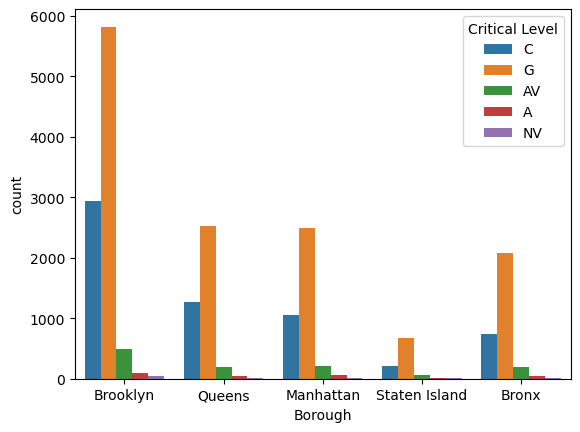

In [17]:
sns.countplot(x='Borough', hue='Critical Level', data=df2)
#graph showing the critical level for all the boroughs

In [18]:
df3=df2[df2['Critical Level']== 'C']
#narrow down to only specific criteria

In [19]:
df3

,SchoolName,Borough,Building_number,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,616,QUINCY ST,616 QUINCY ST,"BROOKLYN, NY 11221",11221.0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,C
1,WILLIAM SPYROPOULOS SCHOOL,Queens,19610,NORTHERN BOULEVARD,19610 NORTHERN BOULEVARD,"FLUSHING, NY 11358",11358.0,NICHOLAS GREEK ST.,C
6,BETHEL ELEMENTARY SCHOOL,Brooklyn,457,GRAND AVENUE,457 GRAND AVENUE,"Brooklyn, NY 11238",11238.0,NORTHEASTERN CONFERENCE OF SEVENTH DAY ADVENTISTS,C
7,INCARNATION SCHOOL,Manhattan,570,WEST 175 STREET,570 WEST 175 STREET,"NEW YORK, NY 10033",10033.0,ARCHDIOCESE OF NEW YORK,C
9,CITY AND COUNTRY SCHOOL,Manhattan,146,W 13TH ST,146 W 13TH ST,"NEW YORK, NY 10011",10011.0,THE CITY AND COUNTRY SCHOOL INC,C
...,...,...,...,...,...,...,...,...,...
24533,P.S. 91 BROOKLYN,Brooklyn,532,ALBANY AVENUE,532 ALBANY AVENUE,"BROOKLYN, NY 11203",11203.0,NEW YORK CITY DEPARTMENT OF EDUCATION,C
24538,TIFERES BNOS,Brooklyn,826,MYRTLE AVE,826 MYRTLE AVE,"BROOKLYN, NY 11206",11206.0,YESHIVA AND MESIVTA ARUGATH HABOSEM,C
24541,JUDITH KAYE HIGH SCHOOL,Manhattan,321,EAST 96 STREET,321 EAST 96 STREET,"NEW YORK, NY 10128",10128.0,NEW YORK CITY DEPARTMENT OF EDUCATION,C
24547,YESHIVA MEOR HATALMUD,Brooklyn,1368,39TH ST,1368 39TH ST,"BROOKLYN, NY 11218",11218.0,CONGREGATION YMH,C


In [20]:
df_critical_level1=df3.groupby(['Borough'])['Critical Level'].count()
#narrow down between critical level only to C to see how many critical mainly for critical

In [21]:
df_critical_level1
#checking to see critical level for boroughs

Borough
Bronx             733
Brooklyn         2940
Manhattan        1054
Queens           1267
Staten Island     212
Name: Critical Level, dtype: int64

<Axes: xlabel='Borough', ylabel='count'>

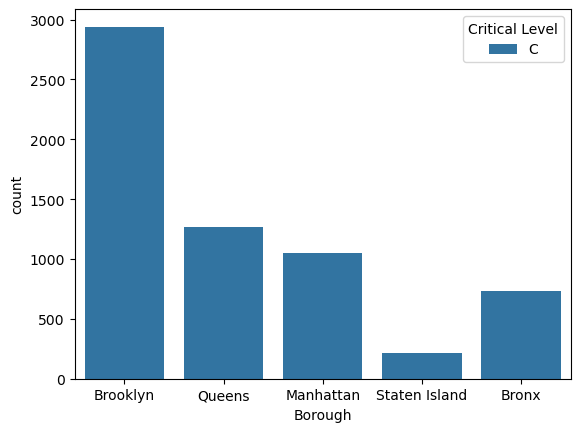

In [22]:
sns.countplot(x='Borough', hue='Critical Level', data=df3)
#Graph specifically data for 'C' to see which borough has violation

In [23]:
df4=df2[df2['Critical Level']== 'G']
#narrow down to G to see which borough has the most violation code

In [24]:
df4

,SchoolName,Borough,Building_number,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,150,WEST 105 STREET,150 WEST 105 STREET,"NEW YORK, NY 10025",10025.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
3,P.S. 119 BROOKLYN,Brooklyn,3829,AVENUE K,3829 AVENUE K,"BROOKLYN, NY 11210",11210.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
5,YESHIVAT MEKOR HAIM,Brooklyn,2710,avenue x,2710 avenue x,"brooklyn, NY 11235",11235.0,CONGREGATION SHAARI TEFILOH OF KINGS HIGHWAY,G
10,NORMAN THOMAS HIGH SCHOOL,Manhattan,111,EAST 33 STREET,111 EAST 33 STREET,"NEW YORK, NY 10016",10016.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
12,STATEN ISLAND HIGH SCHOOL,Staten Island,485,CLAWSON STREET,485 CLAWSON STREET,"STATEN ISLAND, NY 10306",10306.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
...,...,...,...,...,...,...,...,...,...
24542,P.S. 42,Bronx,1537,WASHINGTON AVENUE,1537 WASHINGTON AVENUE,"BRONX, NY 10457",10457.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
24543,P.S. 29,Bronx,758,COURTLANDT AVENUE,758 COURTLANDT AVENUE,"BRONX, NY 10451",10451.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
24544,TALMUD TORAH OHR MOSHE,Brooklyn,1774,58 STREET,1774 58 STREET,"Brooklyn, NY 11204",11204.0,TOLMUD TORAH OHR MOSHE,G
24545,ST. ELIZABETH SCHOOL,Manhattan,612,WEST 187 STREET,612 WEST 187 STREET,"NEW YORK, NY 10033",10033.0,ARCHDIOCESE OF NEW YORK,G


<Axes: xlabel='Borough', ylabel='count'>

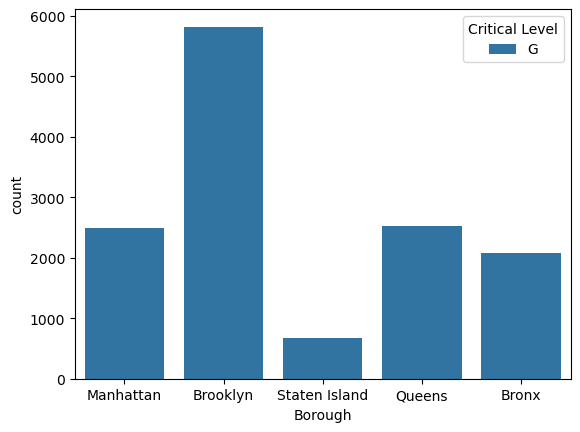

In [25]:
sns.countplot(x='Borough', hue='Critical Level', data=df4)
#graph specificaly for general violation for visuaiization

In [26]:
df_critical_level2=df4.groupby(['Borough'])['Critical Level'].count()

In [27]:
df_critical_level2

Borough
Bronx            2073
Brooklyn         5821
Manhattan        2491
Queens           2533
Staten Island     673
Name: Critical Level, dtype: int64

<Axes: xlabel='Borough'>

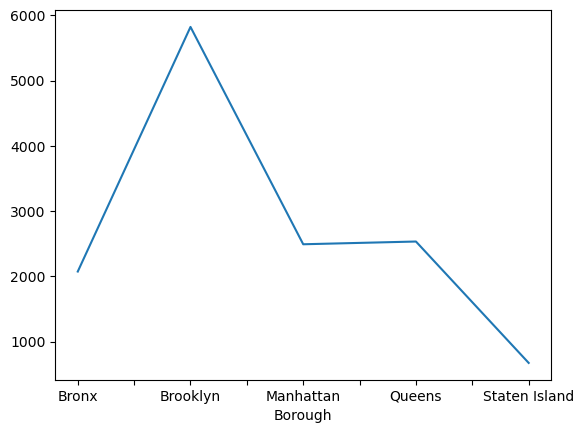

In [28]:
df_critical_level2.plot()
#plot a line graph to see violation specifically for general violation 

In [29]:
df5=df2[df2['Critical Level']== 'A']
#narrow down to A to see which borough has the most violation code

In [30]:
df5

,SchoolName,Borough,Building_number,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
196,OUR LADY OF SORROWS SCHOOL,Queens,35-34,105 STREET,35-34 105 STREET,"CORONA, NY 11368",11368.0,NEW YORK CITY DEPARTMENT OF EDUCATION,A
282,BEACON HIGH SCHOOL,Manhattan,521,W 43RD ST,521 W 43RD ST,"NEW YORK, NY 10036",10036.0,NEW YORK CITY DEPARTMENT OF EDUCATION,A
330,YESHIVA OF STATEN ISLAND,Staten Island,1870,DRUMGOOLE RD E,1870 DRUMGOOLE RD E,"STATEN ISLAND, NY 10309",10309.0,Mesivtha Tiferth Jerusalem,A
455,PATHWAYS TO GRADUATION @ TREY WHITFIELD,Brooklyn,60,WILLIAMS AVE,60 WILLIAMS AVE,"BROOKLYN, NY 11207",11207.0,NEW YORK CITY DEPARTMENT OF EDUCATION,A
505,SUCCESS ACADEMY BRONX 2 MIDDLE SCHOOL,Bronx,270,E 167TH ST,270 E 167TH ST,"BRONX, NY 10456",10456.0,"REVOLUTION FOODS, INC.",A
...,...,...,...,...,...,...,...,...,...
23975,I.S. 229/P.S. 274,Bronx,275,HARLEM RIVER PARK BRIDGE,275 HARLEM RIVER PARK BRIDGE,"BRONX, NY 10453",10453.0,NEW YORK CITY DEPARTMENT OF EDUCATION,A
23976,SHAAR HATORAH HS,Queens,11706,84 AVENUE,11706 84 AVENUE,"RICHMOND HILL, NY 11418",11418.0,YESHIVA SHAAR HATORAH,A
24201,P754X AT LINCOLN HOSPITAL,Bronx,234,E 149TH ST,234 E 149TH ST,"BRONX, NY 10451",10451.0,NEW YORK CITY DEPARTMENT OF EDUCATION,A
24449,RE-START ACADEMY,Manhattan,127,W 127TH ST,127 W 127TH ST,"NEW YORK, NY 10027",10027.0,NEW YORK CITY DEPARTMENT OF EDUCATION,A


In [31]:
df_critical_level3=df5.groupby(['Borough'])['Critical Level'].count()

In [32]:
df_critical_level3
#checking to see the how many violations they have specifically for A.

Borough
Bronx            39
Brooklyn         97
Manhattan        56
Queens           39
Staten Island    14
Name: Critical Level, dtype: int64

<Axes: xlabel='Borough'>

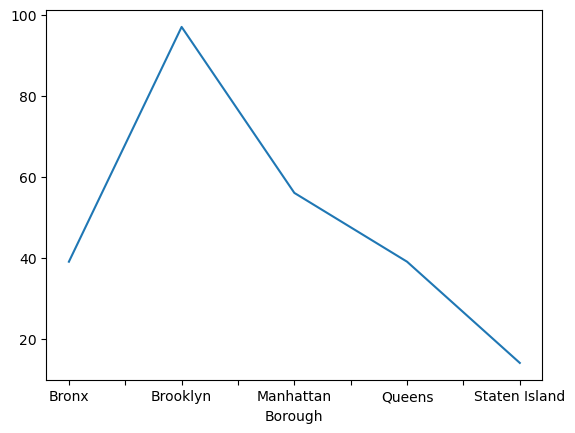

In [33]:
df_critical_level3.plot()
#make line graph narrow violation specifically for A

<Axes: xlabel='Borough', ylabel='count'>

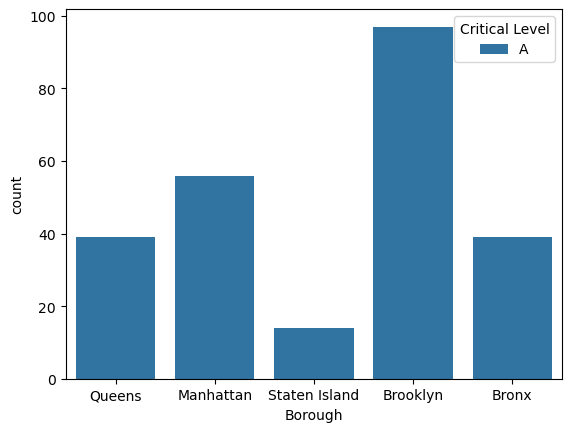

In [34]:
sns.countplot(x='Borough', hue='Critical Level', data=df5)
#make bargraph for look at data

In [35]:
df6=df2[df2['Critical Level']== 'AV']
#narrow down to AV to see which borough has the most violation code

In [36]:
df6

,SchoolName,Borough,Building_number,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,505,BEACH 129 STREET,505 BEACH 129 STREET,"BELLE HARBOR, NY 11694",11694.0,HATORAH OF BELL MERCAZ,AV
23,P.S. 99 QUEENS,Queens,82-37,KEW GARDENS ROAD,82-37 KEW GARDENS ROAD,"KEW GARDENS, NY 11415",11415.0,NEW YORK CITY DEPARTMENT OF EDUCATION,AV
64,SHIELD OF DAVID INSTITUTE FOR SPECIAL CHILDREN,Queens,144-61,ROOSEVELT AVENUE,144-61 ROOSEVELT AVENUE,"FLUSHING, NY 11354",11354.0,NEW YORK CITY DEPARTMENT OF EDUCATION,AV
69,MARTIN LUTHER SCHOOL,Queens,6002,MASPETH AVENUE,6002 MASPETH AVENUE,"MASPETH, NY 11378",11378.0,LUTHER SCHOOL MARTIN,AV
80,P.S. 161 BROOKLYN,Brooklyn,330,CROWN STREET,330 CROWN STREET,"BROOKLYN, NY 11225",11225.0,NEW YORK CITY DEPARTMENT OF EDUCATION,AV
...,...,...,...,...,...,...,...,...,...
24466,J.H.S. 126 BROOKLYN,Brooklyn,424,LEONARD STREET,424 LEONARD STREET,"BROOKLYN, NY 11222",11222.0,NEW YORK CITY DEPARTMENT OF EDUCATION,AV
24481,BROOKLYN S.D.A. ELEMENTARY SCHOOL,Brooklyn,1260,OCEAN AVENUE,1260 OCEAN AVENUE,"Brooklyn, NY 11230",11230.0,SEVENTH DAY ADV BROOKLYN,AV
24515,CANARSIE ASCEND MIDDLE SCHOOL,Brooklyn,744,E 87TH ST,744 E 87TH ST,"BROOKLYN, NY 11236",11236.0,ASCEND CHARTER SCHOOLS,AV
24520,P.S. 23 AT LIFELINE CENTER,Queens,8009,WINCHESTER BOULEVARD,8009 WINCHESTER BOULEVARD,"QUEENS VILLAGE, NY 11427",11427.0,NEW YORK CITY DEPARTMENT OF EDUCATION,AV


In [37]:
df_critical_level4=df6.groupby(['Borough'])['Critical Level'].count()

In [38]:
df_critical_level4
#looking at more analytsis to see how it looks with AV

Borough
Bronx            200
Brooklyn         494
Manhattan        205
Queens           192
Staten Island     60
Name: Critical Level, dtype: int64

<Axes: xlabel='Borough', ylabel='count'>

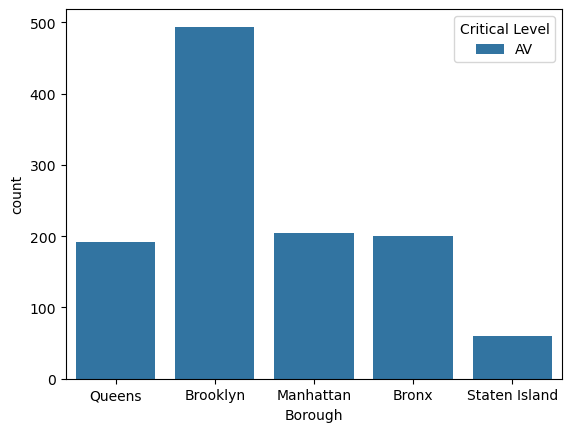

In [39]:
sns.countplot(x='Borough', hue='Critical Level', data=df6)
#show visualization specifically for AV

In [40]:
df7=df2[df2['Critical Level']== 'NV']
#narrow down to NV to see which borough has the most violation code

In [41]:
df7

,SchoolName,Borough,Building_number,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
541,MARTIN LUTHER SCHOOL,Queens,6002,MASPETH AVENUE,6002 MASPETH AVENUE,"MASPETH, NY 11378",11378.0,LUTHER SCHOOL MARTIN,NV
671,YESHIVAT SHAARE TORAH,Brooklyn,1680,CONEY ISLAND AVE,1680 CONEY ISLAND AVE,"BROOKLYN, NY 11230",11230.0,YESHIVAT SHAARE TORAH,NV
1218,BETH JACOB ES,Manhattan,142,BROOME STREET,142 BROOME STREET,"New York, NY 10002",10002.0,BETH JACOB ES,NV
1234,MERKAZ HATORAH OF BELLE HARBOR,Queens,505,BEACH 129 STREET,505 BEACH 129 STREET,"BELLE HARBOR, NY 11694",11694.0,HATORAH OF BELL MERCAZ,NV
1261,YESHIVA TIFERETH ELIMELECH,Brooklyn,1650,56 STREET,1650 56 STREET,"Brooklyn, NY 11204",11204.0,YESHIVA TIFERES ELIMELECH,NV
...,...,...,...,...,...,...,...,...,...
23450,BEER MIRIAM,Brooklyn,275,MARCUS GARVEY BLVD,275 MARCUS GARVEY BLVD,"BROOKLYN, NY 11221",11221.0,BEER MIRIAM INC,NV
23569,CANARSIE ASCEND MIDDLE SCHOOL,Brooklyn,744,E 87TH ST,744 E 87TH ST,"BROOKLYN, NY 11236",11236.0,ASCEND CHARTER SCHOOLS,NV
23849,BNEI SHIMON YISROEL OF SOPRON,Brooklyn,18,WARSOFF PLACE,18 WARSOFF PLACE,"Brooklyn, NY 11205",11205.0,BNEI SHIMON YISROEL OF SOPRON,NV
23850,EQUALITY CHARTER SCHOOL,Bronx,2141,SEWARD AVE,2141 SEWARD AVE,"BRONX, NY 10473",10473.0,EQUALITY CHARTER SCHOOL,NV


In [42]:
df_critical_level5=df7.groupby(['Borough'])['Critical Level'].count()

In [43]:
df_critical_level5
#looking at more analytsis to see how it looks with NV

Borough
Bronx             4
Brooklyn         50
Manhattan        20
Queens            6
Staten Island     4
Name: Critical Level, dtype: int64

<Axes: xlabel='Borough', ylabel='count'>

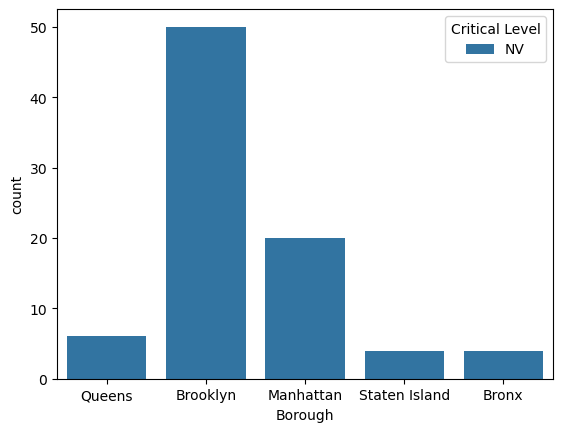

In [44]:
sns.countplot(x='Borough', hue='Critical Level', data=df7)
#show visualization specifically for NV

In [45]:
df2['Permittee'].unique()
#looking at the data want to do comparision between NEW YORK CITY DEPARTMENT OF EDUCATION vs other schools to see who has more violations

array(['EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION', 'NICHOLAS GREEK ST.',
       'NEW YORK CITY DEPARTMENT OF EDUCATION', 'HATORAH OF BELL MERCAZ',
       'CONGREGATION SHAARI TEFILOH OF KINGS HIGHWAY',
       'NORTHEASTERN CONFERENCE OF SEVENTH DAY ADVENTISTS',
       'ARCHDIOCESE OF NEW YORK', 'THE CITY AND COUNTRY SCHOOL INC',
       'YESHIVA RABBI LEIB KOVNER TIFERETH ISRAEL INC.',
       'COMPASS GROUP USA INC',
       'CONGREGATION TALMIDEI MESIVTA TIFERES SHMIEL ALEKSANDER',
       'THE REECE SCHOOL', 'YESHIVA DERECH CHAIM',
       'YESHIVA KEHILATH YAKOV, INC.',
       'BROOKLYN LABORATORY CHARTER SCHOOL INC', 'ESTHER SCHOOL BAIS',
       'YESHIVA TZEMACH TZADIK VIZNITZ',
       'SAM AND ESTHER MINSKOFF CULTURAL CENTER PARK E. DAY SCHOOL',
       'BNOS YAKOV SCHOOL', 'YESHIVA SHAAR HATORAH',
       'MESIVTA NACHLAS YAKOV OF ADAS YEREIM',
       'VIZNITZER CHAIDER TIFERES YISROEL',
       'CONGREGATION YESHIVA DARCHEI TORAH', 'COMPASS GROUP USA, INC.',
       'RENAISSANCE CHART

In [46]:
df8=df2[df2['Permittee']== 'NEW YORK CITY DEPARTMENT OF EDUCATION']
#filter the information specifically to NEW YORK CITY DEPARTMENT OF EDUCATION so that i can do the analysis

In [47]:
df8

,SchoolName,Borough,Building_number,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
2,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,150,WEST 105 STREET,150 WEST 105 STREET,"NEW YORK, NY 10025",10025.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
3,P.S. 119 BROOKLYN,Brooklyn,3829,AVENUE K,3829 AVENUE K,"BROOKLYN, NY 11210",11210.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
10,NORMAN THOMAS HIGH SCHOOL,Manhattan,111,EAST 33 STREET,111 EAST 33 STREET,"NEW YORK, NY 10016",10016.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
11,PS.74 FUTURE LEADERS ELEMENTARY SCHOOL,Staten Island,211,DANIEL LOW TERRACE,211 DANIEL LOW TERRACE,"STATEN ISLAND, NY 10301",10301.0,NEW YORK CITY DEPARTMENT OF EDUCATION,C
12,STATEN ISLAND HIGH SCHOOL,Staten Island,485,CLAWSON STREET,485 CLAWSON STREET,"STATEN ISLAND, NY 10306",10306.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
...,...,...,...,...,...,...,...,...,...
24539,HOLY FAMILY SCHOOL,Bronx,2169,BLACKROCK AVENUE,2169 BLACKROCK AVENUE,"BRONX, NY 10472",10472.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
24541,JUDITH KAYE HIGH SCHOOL,Manhattan,321,EAST 96 STREET,321 EAST 96 STREET,"NEW YORK, NY 10128",10128.0,NEW YORK CITY DEPARTMENT OF EDUCATION,C
24542,P.S. 42,Bronx,1537,WASHINGTON AVENUE,1537 WASHINGTON AVENUE,"BRONX, NY 10457",10457.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G
24543,P.S. 29,Bronx,758,COURTLANDT AVENUE,758 COURTLANDT AVENUE,"BRONX, NY 10451",10451.0,NEW YORK CITY DEPARTMENT OF EDUCATION,G


In [48]:
df_critical_level6=df8.groupby(['Borough'])['Critical Level'].count()

In [49]:
df_critical_level6
#looking at the data to check the numbers of violation for specifically NEW YORK CITY DEPARTMENT OF EDUCATION

Borough
Bronx            2340
Brooklyn         4675
Manhattan        2187
Queens           3021
Staten Island     656
Name: Critical Level, dtype: int64

In [50]:
df_critical_level6.sum()
#show total violation for specifically for New York City Department of Education

12879

In [51]:
df9= df2[df2['Permittee']!='NEW YORK CITY DEPARTMENT OF EDUCATION']
df9
#filter out New york City Department of Education to see if they have more violations specifically or if other permittee has more violations

,SchoolName,Borough,Building_number,Street,Address Line 1,City,ZipCode,Permittee,Critical Level
0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,616,QUINCY ST,616 QUINCY ST,"BROOKLYN, NY 11221",11221.0,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,C
1,WILLIAM SPYROPOULOS SCHOOL,Queens,19610,NORTHERN BOULEVARD,19610 NORTHERN BOULEVARD,"FLUSHING, NY 11358",11358.0,NICHOLAS GREEK ST.,C
4,MERKAZ HATORAH OF BELLE HARBOR,Queens,505,BEACH 129 STREET,505 BEACH 129 STREET,"BELLE HARBOR, NY 11694",11694.0,HATORAH OF BELL MERCAZ,AV
5,YESHIVAT MEKOR HAIM,Brooklyn,2710,avenue x,2710 avenue x,"brooklyn, NY 11235",11235.0,CONGREGATION SHAARI TEFILOH OF KINGS HIGHWAY,G
6,BETHEL ELEMENTARY SCHOOL,Brooklyn,457,GRAND AVENUE,457 GRAND AVENUE,"Brooklyn, NY 11238",11238.0,NORTHEASTERN CONFERENCE OF SEVENTH DAY ADVENTISTS,C
...,...,...,...,...,...,...,...,...,...
24544,TALMUD TORAH OHR MOSHE,Brooklyn,1774,58 STREET,1774 58 STREET,"Brooklyn, NY 11204",11204.0,TOLMUD TORAH OHR MOSHE,G
24545,ST. ELIZABETH SCHOOL,Manhattan,612,WEST 187 STREET,612 WEST 187 STREET,"NEW YORK, NY 10033",10033.0,ARCHDIOCESE OF NEW YORK,G
24546,MAGEN DAVID YESHIVAH HIGH SCHOOL,Brooklyn,7801,BAY PARKWAY,7801 BAY PARKWAY,"Brooklyn, NY 11214",11214.0,MAGEN DAVID YESHIVA,G
24547,YESHIVA MEOR HATALMUD,Brooklyn,1368,39TH ST,1368 39TH ST,"BROOKLYN, NY 11218",11218.0,CONGREGATION YMH,C


In [52]:
df_critical_level7=df9.groupby(['Borough'])['Critical Level'].count()

In [53]:
df_critical_level7
#looking at the data that is not compare to NEW YORK CITY DEPARTMENT OF EDUCATION

Borough
Bronx             709
Brooklyn         4727
Manhattan        1639
Queens           1016
Staten Island     307
Name: Critical Level, dtype: int64

In [54]:
df_critical_level7.sum()

8398

<Axes: xlabel='Borough'>

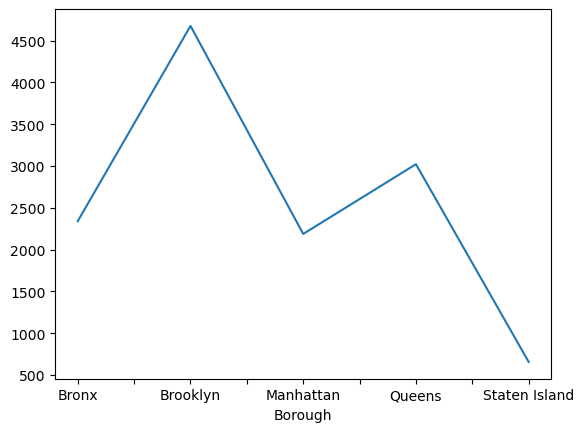

In [55]:
df_critical_level6.plot()
#plot graph to look at comparision of NEW YORK CITY DEPARTMENT OF EDUCATION

<Axes: xlabel='Borough'>

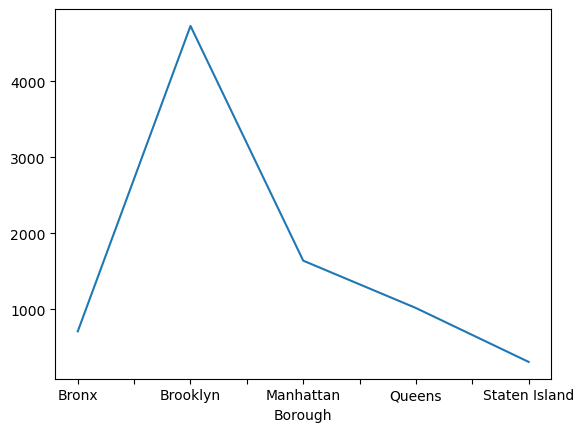

In [56]:
df_critical_level7.plot()
#plot graph to look at comparision of not NEW YORK CITY DEPARTMENT OF EDUCATION

In [57]:
#my final analysis over all Brooklyn borough has the most critical violations when it comes to NEW YORK CITY DEPARTMENT OF EDUCATION versus non NEW YORK CITY DEPARTMENT OF EDUCATION.When doing a further analysis NEW YORK CITY DEPARTMENT OF EDUCATION has more violations than compare to non NEW YORK CITY DEPARTMENT OF EDUCATION.
#After cleaning the data for each critical level the borough brooklyn has the highest violation.
